<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/Assignment2/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 data set

## Loading the CIFAR10 data set

In [0]:
import keras 
import numpy as np
from random import seed
from random import randrange
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Preprocessing

In [0]:
# train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)

In [0]:
#split into validation set and training set at the rate of 8:2
i = 40000
training_images = train_images[:i]
valid_images = train_images[:-i]
training_labels = train_labels[:i]
valid_labels = train_labels[:-i]

In [125]:
print(training_images.shape)
print(training_labels.shape)
print(valid_images.shape)
print(valid_labels.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [0]:
# training_images = np.array(training_images)
# training_labels = np.array(training_labels)
# valid_images = np.array(valid_images)
# valid_labels = np.array(valid_labels)

## Network1 

In [127]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images[0].shape))
network.add(Activation('softmax'))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()
#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 20
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               16777728  
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
__________

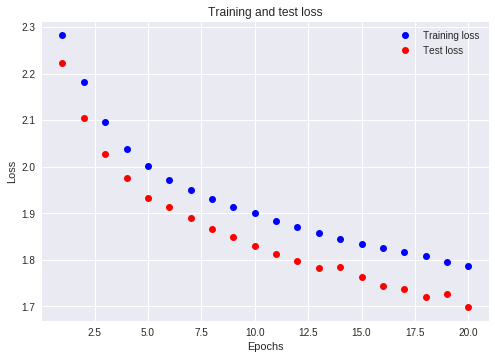

In [128]:
#display result
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

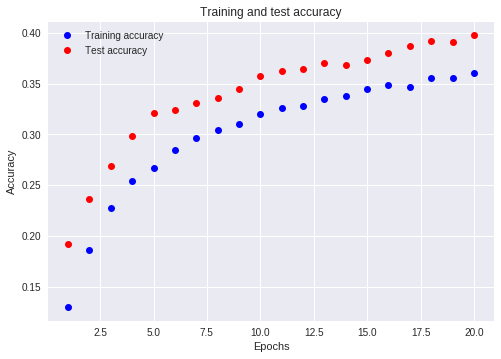

In [129]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Network2

In [130]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images.shape[1:]))
network.add(Activation('relu'))
network.add(Conv2D(32,(3,3)))
network.add(Activation('relu'))

network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()

#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 20
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               14746112  
_________________________________________________________________
activation_29 (Activation)   (None, 512)               0         
__________

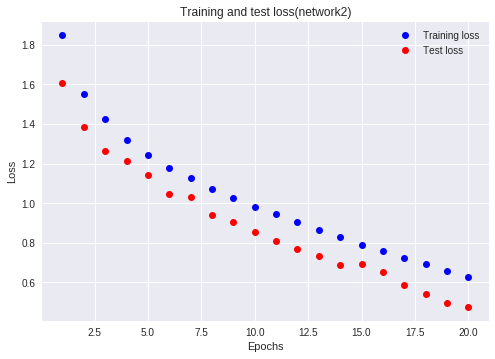

In [131]:
#display training and test loss
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss(network2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

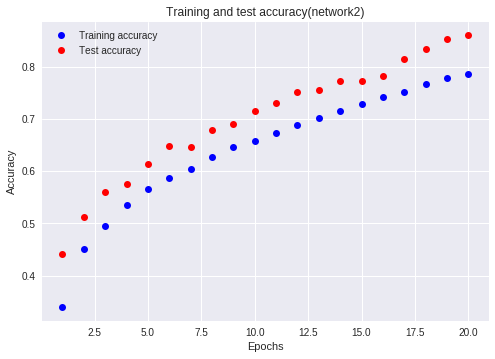

In [132]:
#display training and test accuracy
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy(network2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Network 3: using droplayer


In [133]:

from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
# DROPOUT
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
# model.compile(
#     loss='binary_crossentropy', 
#     optimizer=optimizers.RMSprop(lr=1e-4), 
#     metrics=['acc'])
# #compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 20
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)       147584    
__________

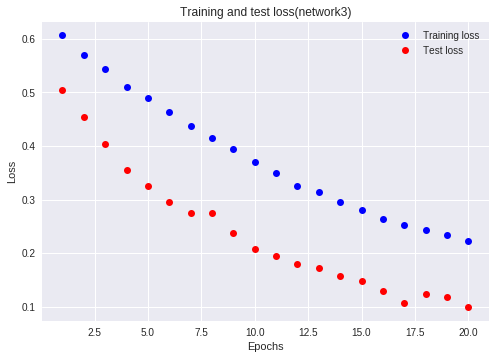

In [134]:
#display training and test loss
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss(network3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

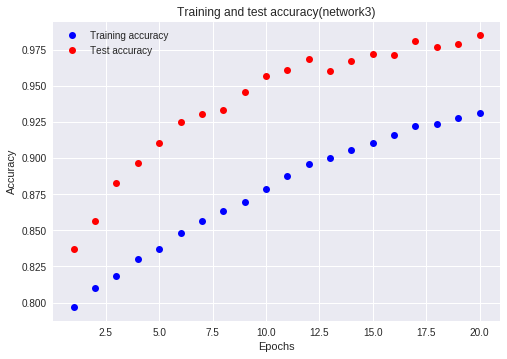

In [135]:
#display training and test accuracy
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy(network3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#compare woth K fold

In [0]:
def k_fold_cross_split(data,folds):
  new_data = list(data)
  fold_size = int(data.shape[0]/folds)
  dataset_split = []
  for i in range(folds):
    fold = []
    for j in range(fold_size):
      index = randrange(len(new_data))
      fold.append(new_data.pop(index))
    dataset_split.append(fold)
  return dataset_split
#split train into training and validation
seed(1)
num_folds = 6
training_images = []
training_labels = []
folds_all = k_fold_cross_split(train_images, num_folds)
folds_all_label = k_fold_cross_split(train_labels,num_folds)
folds_all = np.array(folds_all)
folds_all_label = np.array(folds_all_label)

In [0]:
training_images = np.concatenate((folds_all[0],folds_all[1],folds_all[2],folds_all[3],folds_all[4]))
training_labels = np.concatenate((folds_all_label[0],folds_all_label[1],folds_all_label[2],folds_all_label[3],folds_all_label[4]))
valid_images = folds_all[num_folds-1]
valid_labels = folds_all_label[num_folds-1]

In [138]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images[0].shape))
network.add(Activation('softmax'))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()
#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 20
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               16777728  
_________________________________________________________________
activation_32 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
__________

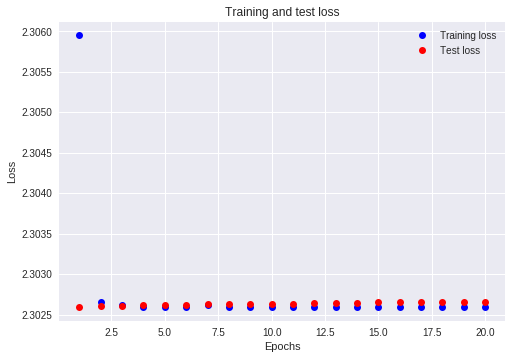

In [139]:
#display result
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

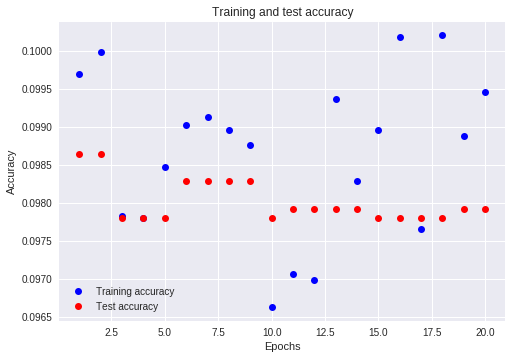

In [140]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()